# **AP157 Machine Learning Lab Assignment** 
## Module 3: Dimensionality Reduction -- Principal Component Analysis of SDSS Galaxy Spectra

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible. 

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1 and 2 are worth 25 and 75 points, respectively).

_Credits_: This assignment is based on the scikit-learn tutorial "Dimensionality Reduction of Astronomical Spectra" ([link](https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/tutorial/astronomy/dimensionality_reduction.html))

### Student Information 

_Full Name (Last Name, First Name)_: Faye Espalmado \
_Student No._: 2018-11616\
_Section_: WFU-WFX

### Submission Information

_Date and Time Submitted (most recent upload)_: June 18, 2021 10:30 PM

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: Faye D. Espalmado** 

### Grading Information (c/o Instructor)

TOTAL SCORE: **100**/100 -- Well done!

Score breakdown:
* Part 1 - []/25
* Part 2 - []/75

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_ 

For this assignment, you will work with galaxy spectra data from the 
Sloan Digital Sky Survey (SDSS). First, you need to make a copy of the file ```spec4000_use.npz``` and save it to a folder in your **own Google Drive**. This file is available from the AP157 Machine Learning Google Drive (under the Datasets folder).

The code cells below will (1) mount your Google Drive and (2) load ```spec4000_corrected.npz``` from your Google Drive folder.

First, mount the Google Drive where you saved the .npy file. 

When you run this cell, you will be asked to sign in to your Google account and you will get an authorization code. Paste the code on the provided cell to mount the Google Drive.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Run this command to list the directories in your Google Drive and check that the mount was successful.

In [ ]:
!ls drive/My\ Drive

 20190602_195704.jpg  'S2-2021 JUNE.gsheet'
'Colab Notebooks'     'S2-2021 PHY191-LAB'
 DOCUMENTS	      'S2-2021 PHY191-LEC'
 S1-2021	      'WACS Data_MCDE2_Espalmado_Faye.pdf'
'S2-2021 APPHY157'     WACS_MCDE2_Espalmado_Faye.pdf


Define the directory path to the location of the file, i.e. if it is in a 
folder named "AP157" under My Drive, then the file path will be "/content/drive/My Drive/AP157". Change the string variable in the code cell below, as needed:

In [ ]:
file_path = "/content/drive/My Drive/S2-2021 APPHY157/C/"

Now, we can load the file using $\tt numpy$'s $\tt load$ function below.


In [ ]:
import numpy as np
data = np.load(file_path + 'spec4000_use.npz')

The NpzFile object is a dictionary-like object which can be queried for its list of arrays and the arrays themselves ([reference](https://numpy.org/doc/stable/reference/generated/numpy.savez.html)). Our object contains two arrays: ``spec_recons`` - 4000 reconstructed SDSS spectra each with 1000 attributes (flux in units of $10^{-17}$ erg cm$^{-2}$ s$^{-1}$ Å$^{-1}$) and ``wavelength`` - array of wavelengths (in units of Angstroms) corresponding to these attributes.

In [ ]:
data.files

['spec_recons', 'wavelength']

In [ ]:
np.shape(data['spec_recons']), np.shape(data['wavelength'])

((4000, 1000), (1000,))

Let's plot the first few spectra to visualize our data

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Sample SDSS spectra')

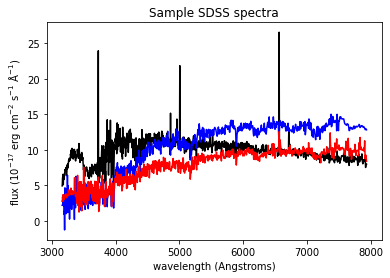

In [ ]:
wavelength = data['wavelength']
flux0 = data['spec_recons'][0,:]
flux1 = data['spec_recons'][1,:]
flux2 = data['spec_recons'][2,:]

plt.plot(wavelength, flux0, 'k-')
plt.plot(wavelength, flux1, 'b-')
plt.plot(wavelength, flux2, 'r-')
plt.ylabel("flux ($10^{-17}$ erg cm$^{-2}$ s$^{-1}$ Å$^{-1}$)")
plt.xlabel("wavelength (Angstroms)")
plt.title("Sample SDSS spectra")

#### PART 1 - Get mean normalized spectrum *(25 pts.)*

Plot the mean spectrum by first normalizing the spectra and plot the mean and standard deviation. For this, you may use the ``normalize`` function in scikit-learn's preprocessing module [(documentation)](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html). Describe the mean spectrum and note wavelengths with the highest variation across the sample. What is the reason for this variation?


The spectra data was rescaled to a unit norm using sklearn's `normalize() ` function. The mean and standard deviation along the axis 0 of the normalized data was calculated using numpy's `mean()` and `std()` function, respectively. The mean was then plotted against the wavelegnth data using matplotlib functions. +/- one standard deviation of the mean was also plotted . \



(3162.2776601683795, 7935.969681957695)

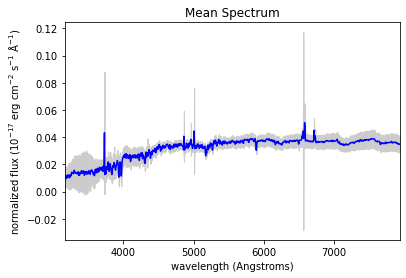

In [ ]:
from sklearn import preprocessing
 
nspec = preprocessing.normalize(data['spec_recons'])
mean = np.mean(nspec,axis=0) #axis=0 to get the mean of the data points vertically down the rows of the nspec array
std = np.std(nspec,axis=0)

plt.plot(wavelength, mean, 'b-')
plt.fill_between(wavelength, mean-std, mean+std, color='#CCCCCC')
plt.ylabel("normalized flux ($10^{-17}$ erg cm$^{-2}$ s$^{-1}$ Å$^{-1}$)")
plt.xlabel("wavelength (Angstroms)")
plt.title("Mean Spectrum")
plt.xlim(wavelength[0], wavelength[-1])

In [ ]:
np.shape(nspec)

(4000, 1000)

The gray shaded region in the plot shows the variation of the spectra from the mean. From the plot, largest variations and peaks occur at the wavelengths that are emitted and absorbed by hydrogen. The peak at 6563 Angstrom and 4861 Angstrom correspond to the H$\alpha$ and H$\beta$ spectral line of the Balmer Series. These spectral lines are indicative of a galaxy, where hydrogen is highly present.


#### PART 2 - Get principal components *(75 pts.)*

Perform Principal Component Analysis (PCA) and visualize the top principal components:
1. Get the first 4 principal components using the ``PCA`` function in scikit-learn's decomposition module [(documentation)](https://scikit-learn.org/0.15/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA). Make sure to use the normalized spectra as input. *(25 pts.)* 


**1.** Here, we utilize sklearn's `PCA()` to initialize the PCA model. The `n_components=4` argument corresponds to the the first 4 principal components we want to get. The model is then fitted with the `nspec` data and dimensionality reduction is then performed with the `nspec` data using the `fit_transform()` function.
This projects the original data which originally had 1000 dimensions into 4 dimensions.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
projected = pca.fit_transform(nspec)

#print dimensions
print(np.shape(nspec),"-->",np.shape(projected))

(4000, 1000) --> (4000, 4)


2. Plot the first two principal components (coefficient 1 in the x axis and coefficient 2 in the y axis). Make sure to label the axes and good to set x and y axis limits to be equal. *(25 pts.)* 

**2.** Here we visualize the 2D projection by plotting the first two principal components. We access the column index `[0:n]` of the projected array to get the principal components.



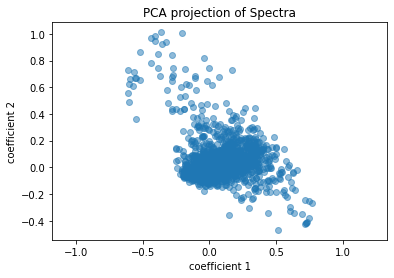

In [ ]:
plt.scatter(projected[:, 0], projected[:, 1],alpha=0.5)
plt.xlabel('coefficient 1')
plt.ylabel('coefficient 2')
plt.title('PCA projection of Spectra')
plt.axis('equal')
plt.show()

3. Plot the first 4 eigenvectors together with the mean spectrum. Add an arbitrary y-offset between the spectra for clarity. *(25 pts.)* 

**3.** Here we plot the mean spectrum and eigenvectors of the spectral data, with a 0.2 y-offset. The mean and eigenvectors are obtained by accessing the `mean_` and `components_` attribute of the `pca` object. 

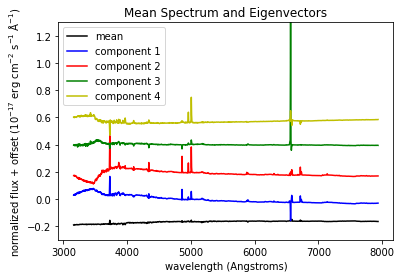

In [ ]:
y_offset=0.2
mean = pca.mean_-y_offset
nflux0 = pca.components_[0]
nflux1 = pca.components_[1]+y_offset
nflux2 = pca.components_[2]+2*y_offset
nflux3 = pca.components_[3]+3*y_offset

plt.plot(wavelength, mean, 'k-',label="mean")
plt.plot(wavelength, nflux0, 'b-',label="component 1")
plt.plot(wavelength, nflux1, 'r-',label="component 2")
plt.plot(wavelength, nflux2, 'g-',label="component 3")
plt.plot(wavelength, nflux3, 'y-',label="component 4")

plt.ylabel("normalized flux + offset ($10^{-17}$ erg cm$^{-2}$ s$^{-1}$ Å$^{-1}$)")
plt.xlabel("wavelength (Angstroms)")
plt.title("Mean Spectrum and Eigenvectors")
plt.ylim(-0.3,1.3)
plt.legend()
plt.show()